Salary Prediction

In this project, I will be using Linear regression, Lasso, Random Forest Regressor, and Decision Tree Regressor models to predict the salary of people who are employed based on a variety of features. The motivation of this project is to not only apply these various models get practice on real-world data, but also to help people out there to predict the salary of their dreamed profession! The dataset that we'll be using is a salary dataset from Kaggle (https://www.kaggle.com/datasets/mohithsairamreddy/salary-data/data). The dataset in total has 6000+ rows and contains five variables:
1. Age
2. Experience
3. Job Role
4. Education Level
5. Salary

In [1]:
# Import the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Load the dataset
df = pd.read_csv('./Salary_Data.csv')
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.shape

(6704, 6)

The size of the data is 6704 rows and 6 columns.
Besides age, years of experience, and salary, the other columns are in object type. However, since this is a regression problem, we'll have to encode them to numeric representation later.

In [4]:
# Check for column types of if there are null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [6]:
# From the above, we can see that there are null values in almost every column, although not too many.
# We'll do another check here
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
# Once we've confirmed them. Let's drop them!
df.dropna(inplace=True)
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [8]:
# Age, years of experience, and salary are continous variables. Whereas, gender, education level
# and job titles are categorical. Let's dive deeper into these categorical variables and see if
# any transformations need to be done on them because some could have too many variations or special
# characters could be in them.

# Job title
df['Job Title'].value_counts()

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64

In [9]:
job_counts = df['Job Title'].value_counts()
jobs_to_be_filtered_out = job_counts[job_counts<30]

# There are jobs that only have very few people in it, so let's label them as Others to reduce some noise
df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in jobs_to_be_filtered_out else x)
len(df[df['Job Title'] == 'Others']) # 435 records have been labeled as 'Others'

435

In [10]:
# Education level
df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [11]:
# there's some transformation that we can do here...
df['Education Level'] = df['Education Level'].replace(["Bachelor's Degree"], ["Bachelor's"])
df['Education Level'] = df['Education Level'].replace(["Master's Degree"], ["Master's"])
df['Education Level'] = df['Education Level'].replace(["phD"], ["PhD"])
df['Education Level'].value_counts()

Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [12]:
# Lastly, let's take a look at Gender
df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

In [13]:
# people who are identified as 'Other' in gender should be removed since it could be a data
# entry error
df.drop((df[df['Gender']=='Other']).index, inplace = True)
df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Name: count, dtype: int64

What we've done so far is preparing the data for EDA and Modeling. Specifically, we've done transformation, dropped rows that could be errenous, and performed data munging. Now the dataset should be ready to perform further analysis and modeling!

<Axes: xlabel='Gender'>

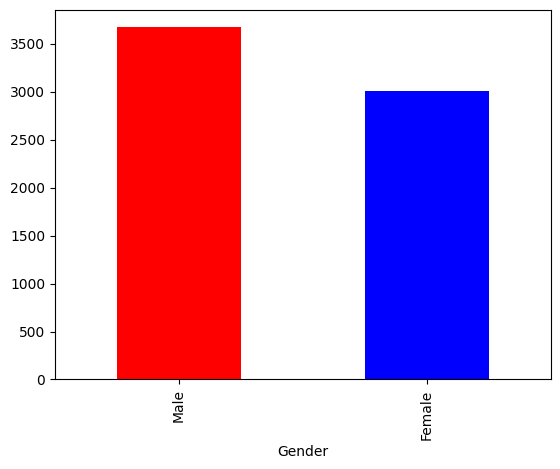

In [14]:
df.Gender.value_counts().plot(kind='bar', color=['blue' if x == 'Female' else 'Red' for x in df['Gender']])

The data in terms of gender, is not imbalanced. Seems to have a similar number of male and female.

<Axes: xlabel='Education Level'>

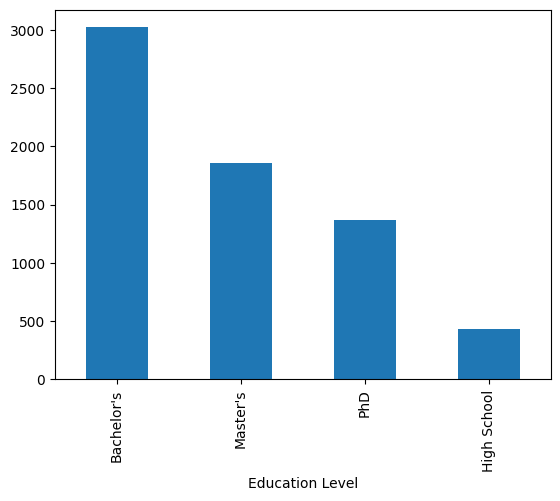

In [15]:
df['Education Level'].value_counts().plot(kind='bar')

This immediately stands out to us that a pretty big proportation of the people only have a bachelor's degree.

<Axes: xlabel='Job Title'>

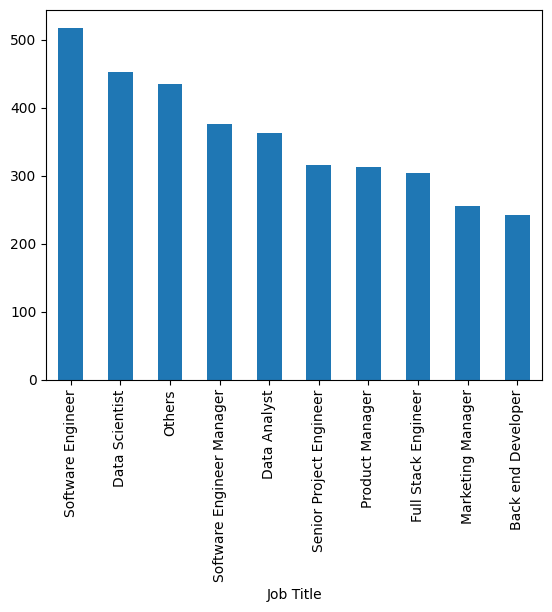

In [16]:
df['Job Title'].value_counts().head(10).plot(kind='bar')

Pretty big portion of the people are in the IT industry.

Text(0, 0.5, 'Age')

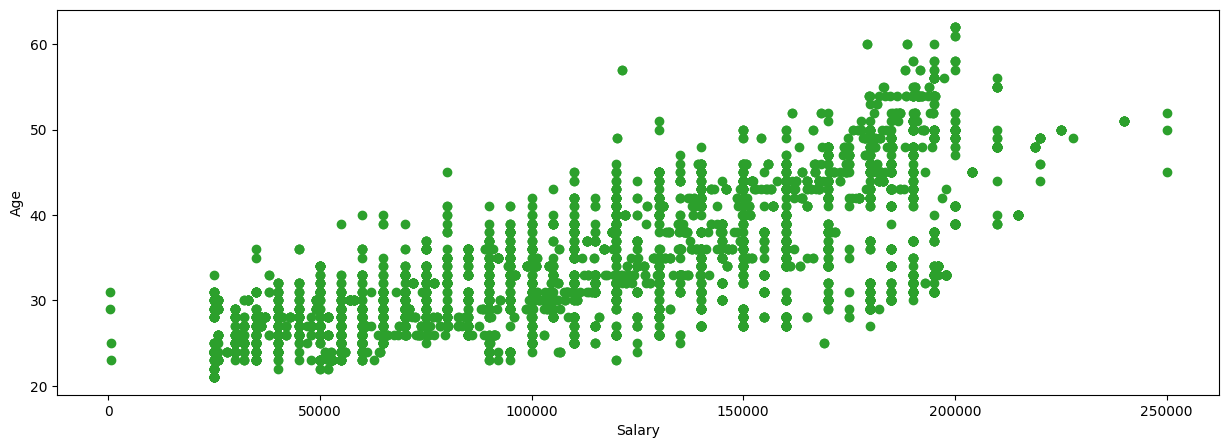

In [17]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(x='Salary', y='Age', data=df, color = 'C2')
ax.set_xlabel('Salary')
ax.set_ylabel('Age')

From the above graph, we can see there's pretty high correlation between salary and age, we'll see it more clearly later when we show the correlation matrix.

Text(0, 0.5, 'Age')

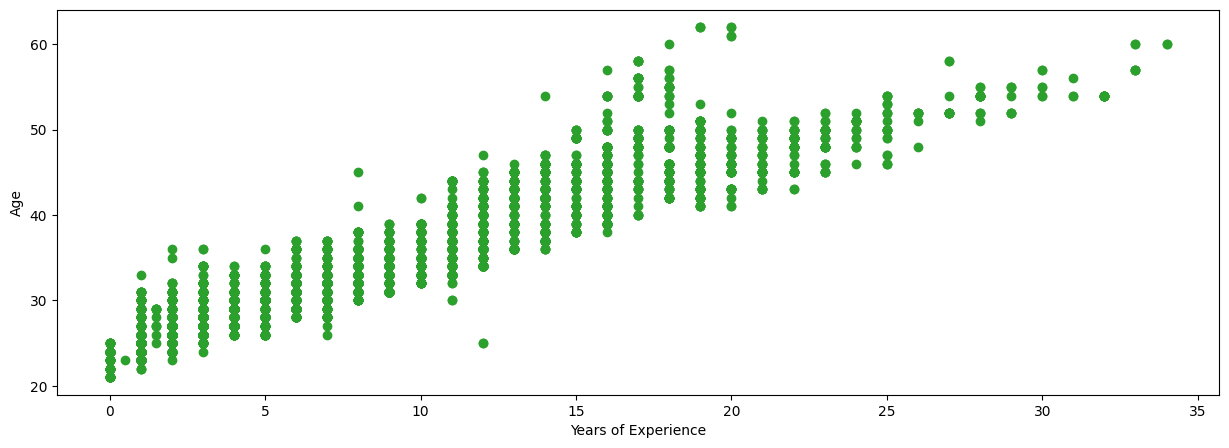

In [18]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(x='Years of Experience', y='Age', data=df, color = 'C2')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Age')

As expected, there's also high correlation between years of experience and age. This means if we were to plot years of experience against salary, we'll also see the positive correlation trend. Let's show it below

Text(0, 0.5, 'Years of Experience')

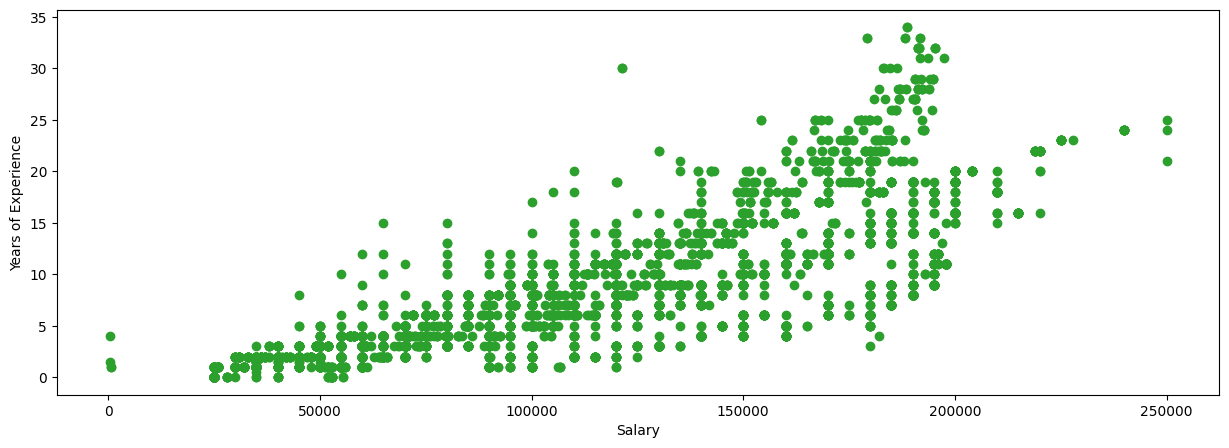

In [19]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(x='Salary', y='Years of Experience', data=df, color = 'C2')
ax.set_xlabel('Salary')
ax.set_ylabel('Years of Experience')

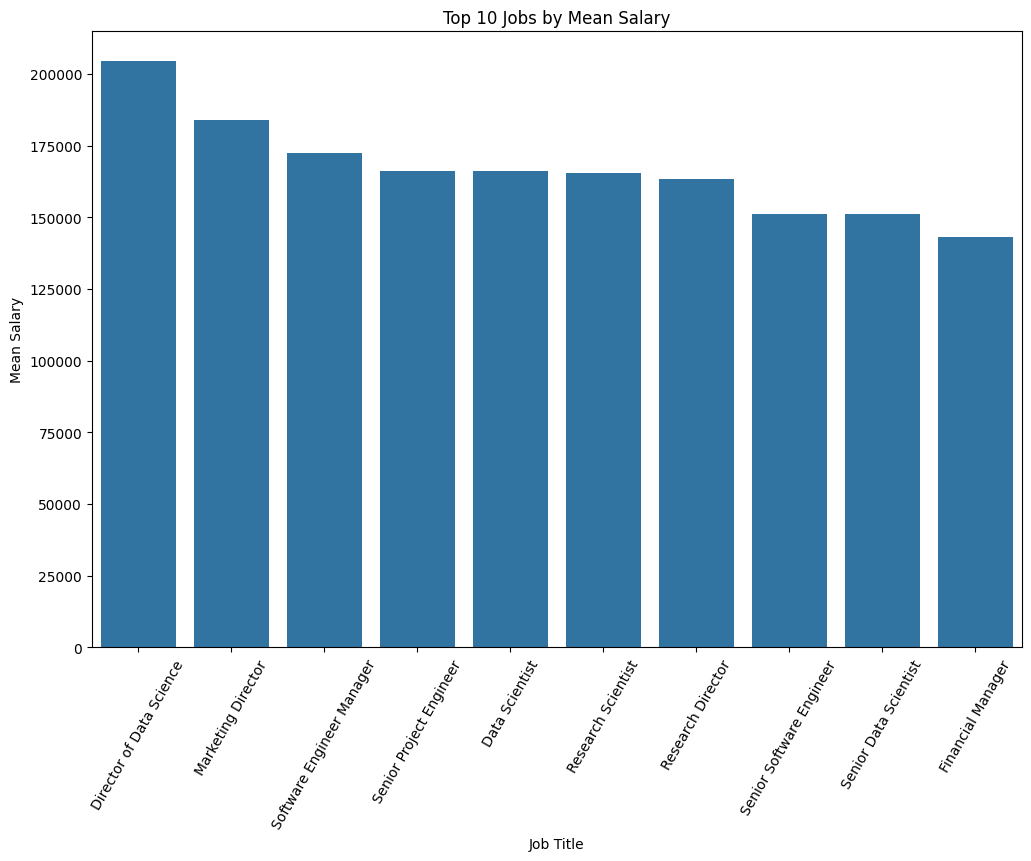

In [20]:
# it'd be interesting to know which profession are in the top 10 highest paying job by mean salary
top_10 = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10.index, y=top_10.values)
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Jobs by Mean Salary')
plt.xticks(rotation=60)
plt.show()

From the above graph, we can see that data scientists and engineers are paid the highest.

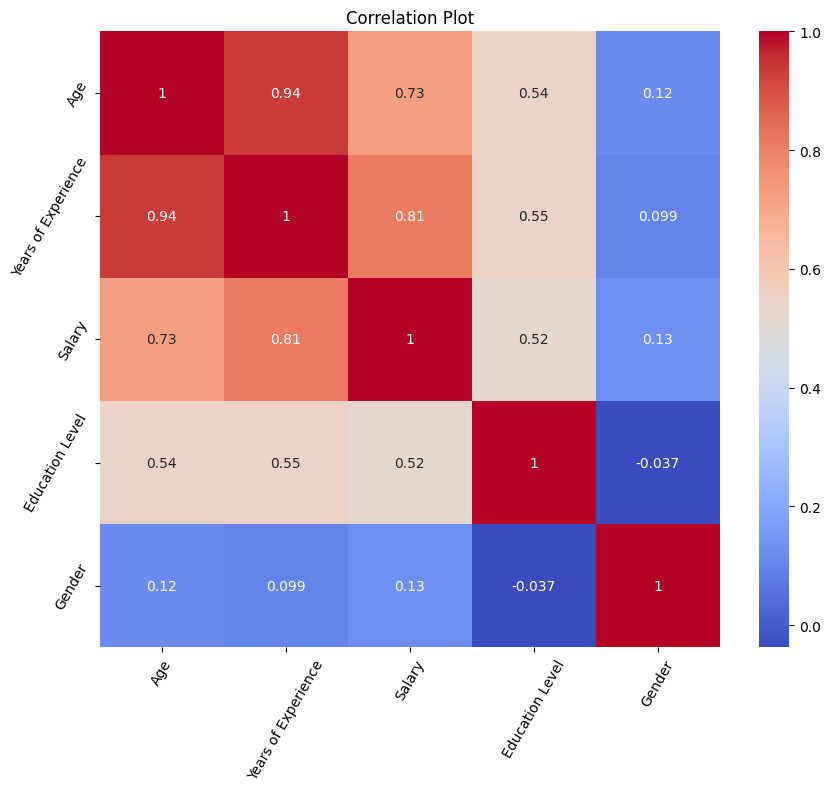

In [21]:
# show the correlation matrix
le = LabelEncoder()
df['Education Level'] = le.fit_transform(df['Education Level'])
df['Gender'] = le.fit_transform(df['Gender'])
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Age', 'Years of Experience', 'Salary', 'Education Level', 'Gender']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.xticks(rotation=60) 
plt.yticks(rotation=60) 
plt.show()


The heatmap shows:
1. Highest correlation between age and years of experience
2. High correlation between salary and years of experience
3. High correlation between salary and age
4. There's correlation in salary vs education level, but not so high compared to #1-3

In [22]:
# we will encode the education and gender columns as the models work better with numbers
df2 = df.copy()

# Now, for job title, we will also conver them into numerical format
dummies = pd.get_dummies(df2['Job Title'], drop_first=True, dtype=int)
df2 = pd.concat([df2, dummies],axis=1)
df2.drop('Job Title', inplace=True, axis=1)
df2.head(5)

,Age,Gender,Education Level,Years of Experience,Salary,Content Marketing Manager,Data Analyst,Data Scientist,Digital Marketing Manager,Director of Data Science,...,Senior HR Generalist,Senior Human Resources Manager,Senior Product Marketing Manager,Senior Project Engineer,Senior Research Scientist,Senior Software Engineer,Software Developer,Software Engineer,Software Engineer Manager,Web Developer
0,32.0,1,0,5.0,90000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,28.0,0,2,3.0,65000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,1,3,15.0,150000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,0,0,7.0,60000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,1,2,20.0,200000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we will start preparing the train and test data to fit into our models to make our predictions.

In [23]:
x = df2.drop('Salary', axis=1)
y = df2['Salary']

# split the data into 20% training and 80% testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape

(5347, 52)

In [24]:
x_test.shape

(1337, 52)

In [25]:
y_train.shape

(5347,)

In [26]:
y_test.shape

(1337,)

We'll be using Linear Regression, Lasso, Decision Tree, and Random Forest models to predict our salary data.
Also, we'll combine them with GridSearchCV for hyperparameter tuning.

In [27]:
# Linear Regression
optimal_params = []
warnings.filterwarnings('ignore')
params = {'alpha': (np.logspace(-8, 8, 100))}
lasso = Lasso()
lasso_model = GridSearchCV(lasso, params, cv=5)
lasso_model.fit(x_train, y_train)
optimal_params.append({'Model': 'Lasso', 'Params': lasso_model.best_params_, 'Score': lasso_model.best_score_})

clf = GridSearchCV(LinearRegression(), param_grid={}, cv=5)
clf.fit(x_train, y_train)
optimal_params.append({'Model': 'LinearRegression', 'Params': clf.best_params_, 'Score': clf.best_score_})

#  Decision Tree
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'random_state': [0, 42],
    'min_samples_split': [1, 5, 10, 15, 20]
}

dt = GridSearchCV(DecisionTreeRegressor(), param_grid=params, cv=5)
dt.fit(x_train, y_train)
optimal_params.append({'Model': 'DecisionTree', 'Params': dt.best_params_, 'Score': dt.best_score_})

# Random Forest
params = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80]
}

rfr = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=5)
rfr.fit(x_train, y_train)
optimal_params.append({'Model': 'RandomForest', 'Params': rfr.best_params_, 'Score': rfr.best_score_})

In [28]:
optimal_params

[{'Model': 'Lasso',
  'Params': {'alpha': 0.39442060594376643},
  'Score': 0.8303631344682015},
 {'Model': 'LinearRegression', 'Params': {}, 'Score': 0.8303624264229426},
 {'Model': 'DecisionTree',
  'Params': {'max_depth': 10, 'min_samples_split': 5, 'random_state': 42},
  'Score': 0.9463453224166949},
 {'Model': 'RandomForest',
  'Params': {'n_estimators': 80},
  'Score': 0.975467752903174}]

After fitting the four models and finding out optimal parameters by running them with GridsearchCV / Cross-Validation,
We can see that Random Forest has the highest score. Now we'll make predictions against the test datasets.

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# build a dictionary to store the mean squared metrics
mean_sq_values = {}
def store_mean_sq_metrics(model, y_pred):
    mean_sq_values[model] = {
            'MSE: ': mean_squared_error(y_test, y_pred),
            'MAE: ': mean_absolute_error(y_test, y_pred),
            'RMSE: ': mean_squared_error(y_test, y_pred, squared=False)
    }


# Random Forest
rfr = RandomForestRegressor(n_estimators=80)
rfr.fit(x_train, y_train)
print(rfr.score(x_test, y_test))
y_pred = rfr.predict(x_test)
if 'rfr' not in mean_sq_values:
    store_mean_sq_metrics('rfr', y_pred)

0.9701229629821201


In [30]:
# Decision Tree
dtr = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dtr.fit(x_train, y_train)
print(dtr.score(x_test, y_test))
y_pred = dtr.predict(x_test)
if 'dtr' not in mean_sq_values:
    store_mean_sq_metrics('dtr', y_pred)

0.9444588983560296


In [31]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.score(x_test, y_test))
y_pred = lin_reg.predict(x_test)
if 'lin_reg' not in mean_sq_values:
    store_mean_sq_metrics('lin_reg', y_pred)

0.8361047226168612


In [32]:
# Lasso Regression
lasso = Lasso(alpha=0.3944)
lasso.fit(x_train, y_train)
print(lasso.score(x_test, y_test))
y_pred = lasso.predict(x_test)
if 'lasso' not in mean_sq_values:
    store_mean_sq_metrics('lasso', y_pred)

0.8361220252828735


In [33]:
from pprint import pprint
pprint(mean_sq_values)

{'dtr': {'MAE: ': 7530.839155985247,
         'MSE: ': 154343800.6272907,
         'RMSE: ': 12423.518045517167},
 'lasso': {'MAE: ': 15722.307078228534,
           'MSE: ': 455402372.44628465,
           'RMSE: ': 21340.158679032465},
 'lin_reg': {'MAE: ': 15723.653513040277,
             'MSE: ': 455450455.02214795,
             'RMSE: ': 21341.285224234925},
 'rfr': {'MAE: ': 3654.138683744222,
         'MSE: ': 83025638.82116398,
         'RMSE: ': 9111.840583612291}}


Some key takeaways:
1. Lasso and linear regression are the worst out of the four due to the fact that they have significantly much lower R-squared values than the other two, with around 0.83 for both.
2. Decision Tree model performed pretty well with high R-squared score of 0.944, but it has higher values in the metrics that we calculated in MSE, MAE, and RMSE.
3. Random Forest, on the other hand, performed even better in R-squared value with 0.97 and has much lower values in MSE, MAE, and RMSE than Decision Tree.

Now that we have figured out which model is the best out of the four, let's take a look at feature importance to see which features are the most important.

In [34]:
rfr.feature_importances_

array([4.72588234e-02, 7.19531170e-03, 2.03864644e-02, 7.57535296e-01,
       1.86288338e-04, 3.45931095e-02, 3.48823797e-02, 2.50153052e-04,
       1.71474180e-03, 1.55820112e-03, 3.22932483e-04, 2.42338566e-04,
       3.27977405e-03, 1.09089636e-04, 2.96826317e-03, 5.84712554e-03,
       2.76984958e-04, 2.87074877e-04, 4.69541517e-04, 4.43090151e-05,
       6.32824495e-04, 8.32137938e-05, 5.69032838e-04, 2.96114541e-05,
       1.10088542e-04, 1.23022917e-04, 2.60339494e-04, 2.80643442e-03,
       1.69289321e-03, 8.43964410e-04, 6.37341945e-03, 2.36719292e-04,
       1.88711896e-02, 3.47418128e-05, 3.96581454e-04, 1.77631503e-04,
       5.43348676e-05, 1.17562095e-03, 1.63494234e-04, 4.13755465e-04,
       3.15527812e-04, 2.30990600e-04, 4.29341881e-04, 7.21563607e-04,
       3.71480746e-04, 3.68578325e-03, 8.77166675e-04, 3.28685037e-03,
       3.32365242e-04, 3.01330150e-02, 4.30145445e-03, 8.57343770e-04])

In [35]:
# mapping feature importance
feature_names = list(x_train.columns)
feature_importance = rfr.feature_importances_
feature_map = {}
for i in range(len(feature_names)):
    feature = feature_names[i]
    importance = feature_importance[i]
    feature_map[feature] = importance

# sort by importance (descending)
sorted_feature_map = {k: v for k, v in sorted(feature_map.items(), key=lambda item: item[1], reverse=True)}

# get top10 features
top_10_x = []
top_10_y = []
for x, y in sorted_feature_map.items():
    top_10_x.append(x)
    top_10_y.append(y)

top_10_x = top_10_x[:10]
top_10_y = top_10_y[:10]
print(top_10_x)
print(top_10_y)


['Years of Experience', 'Age', 'Data Scientist', 'Data Analyst', 'Software Engineer', 'Education Level', 'Product Manager', 'Gender', 'Others', 'Full Stack Engineer']
[0.7575352955854782, 0.04725882337999253, 0.03488237966142671, 0.034593109530467715, 0.030133014985610357, 0.020386464419046485, 0.018871189620940938, 0.007195311698465656, 0.006373419449241163, 0.005847125536895082]


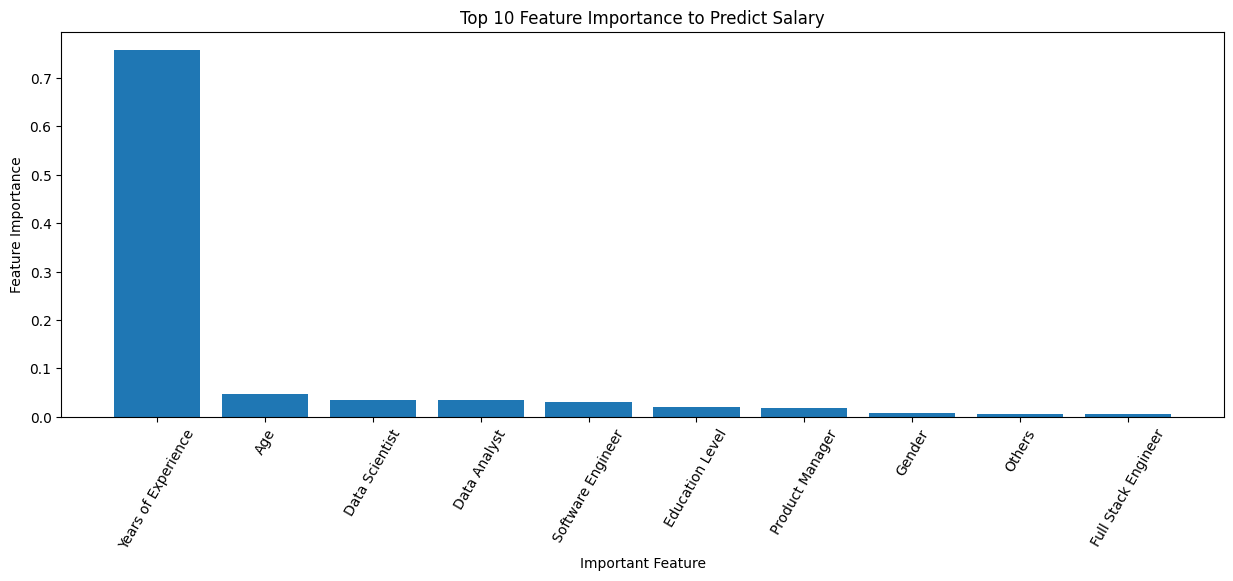

In [36]:
plt.figure(figsize=(15, 5))
plt.bar(top_10_x, top_10_y)
plt.xlabel('Important Feature')
plt.ylabel('Feature Importance')
plt.title('Top 10 Feature Importance to Predict Salary')
plt.xticks(rotation=60)
plt.show()

Takeaway:
1. We can see that years of experience dominate other features when it comes to how important it is when predicting salary. From the graphs we've seen before, we already knew that it has high correlation with salary, but we didn't know that it'd be much more important than age, which was the other feature that also had an extremely high correlation with salary.
2. Data scientist and engineers are still top factors when it comes to affecting the amount of salary, probably due to the fact that these job titles get paid better than the others.
3. Gender and education level don't have too much importance when it comes to affecting the salary number which is expected. We've seen that many folks only had Bachelor's degree and due to the nature of recruitment, gender isn't really a deciding factor.

Even though we already achieved a pretty good R-squared value in Random Forest Regressor, I still believe that it can be improved by further tuning the hyperparameters by trying out other values.